# 1. Motivation

## What is your dataset?
## Why did you choose this/these particular dataset(s)?
## What was your goal for the end user's experience?

# 2. Basic stats

## Write about your choices in data cleaning and preprocessing
## Write a short section that discusses the dataset stats, containing key points/plots from your exploratory data analysis.

In [8]:
import pandas as pd
import io
import urllib.request

# URL of the CSV file
url = 'https://data.sfgov.org/resource/wg3w-h783.csv?$limit=846175'

# Use urllib to load the CSV data from the URL
with urllib.request.urlopen(url) as response:
    csv_data = response.read().decode('utf-8')

# Convert the string data to a pandas DataFrame
data = pd.read_csv(io.StringIO(csv_data))

# Now 'data' holds the DataFrame object of the CSV file.

# Print column names to ensure the correct reference
print("Column names in the dataset:")
print(data.columns) 


Column names in the dataset:
Index(['incident_datetime', 'incident_date', 'incident_time', 'incident_year',
       'incident_day_of_week', 'report_datetime', 'row_id', 'incident_id',
       'incident_number', 'cad_number', 'report_type_code',
       'report_type_description', 'filed_online', 'incident_code',
       'incident_category', 'incident_subcategory', 'incident_description',
       'resolution', 'intersection', 'cnn', 'police_district',
       'analysis_neighborhood', 'supervisor_district',
       'supervisor_district_2012', 'latitude', 'longitude', 'point',
       ':@computed_region_jwn9_ihcz', ':@computed_region_jg9y_a9du',
       ':@computed_region_h4ep_8xdi', ':@computed_region_n4xg_c4py',
       ':@computed_region_nqbw_i6c3', ':@computed_region_viu7_rrfi',
       ':@computed_region_26cr_cadq', ':@computed_region_qgnn_b9vv'],
      dtype='object')


In [9]:
# Assuming 'data' is our DataFrame
filtered_data = data.query("`police_district` != 'Out of SF'")

PD_Counts = filtered_data['police_district'].unique()

PD_Counts

array(['Mission', 'Central', 'Park', 'Bayview', 'Richmond', 'Southern',
       'Northern', 'Taraval', 'Tenderloin', 'Ingleside'], dtype=object)

In [10]:
CrimeCategories_Counts

incident_category
Larceny Theft                                   252192
Malicious Mischief                               57077
Other Miscellaneous                              56999
Assault                                          51524
Non-Criminal                                     48381
Burglary                                         46841
Motor Vehicle Theft                              45281
Fraud                                            26229
Recovered Vehicle                                24141
Warrant                                          23924
Lost Property                                    21628
Drug Offense                                     21063
Robbery                                          18810
Missing Person                                   17652
Suspicious Occ                                   17089
Disorderly Conduct                               14393
Offences Against The Family And Children         11023
Miscellaneous Investigation                    

C:\Users\Rohan\AppData\Local\Temp\ipykernel_19380\741991546.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['incident_date'] = pd.to_datetime(filtered_data['incident_date'])


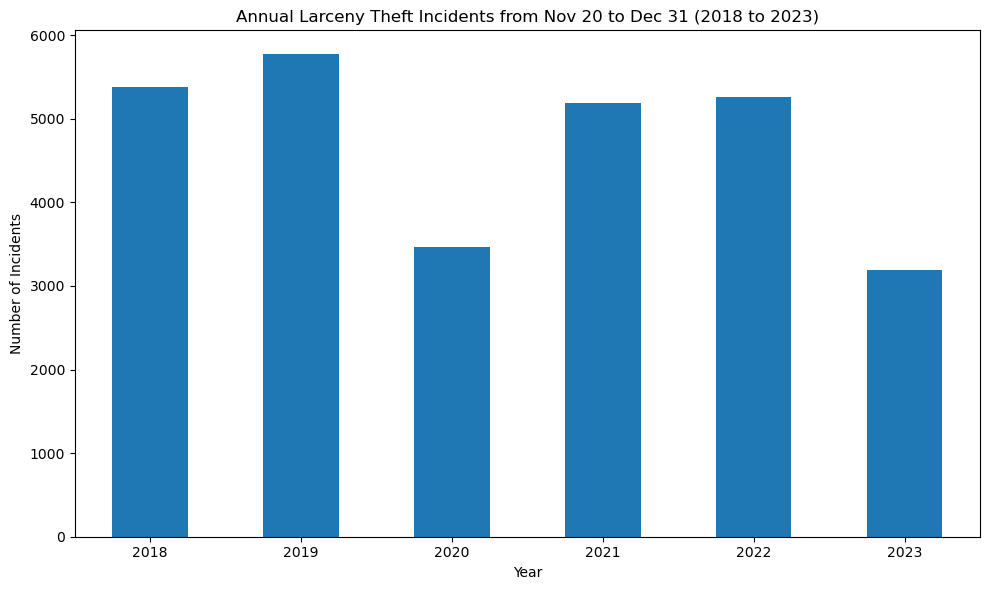

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'filtered_data' is your pre-filtered DataFrame
# Convert 'Incident Date' to datetime format if it's not already
filtered_data['incident_date'] = pd.to_datetime(filtered_data['incident_date'])

# Filter for 'Forgery And Counterfeiting' incidents
larceny_data = filtered_data[
    filtered_data['incident_category'] == 'Larceny Theft'
]

# Create a boolean mask for the specific time period each year
is_in_time_period = (larceny_data['incident_date'].dt.month == 11) & \
                    (larceny_data['incident_date'].dt.day >= 20) | \
                    (larceny_data['incident_date'].dt.month == 12)

# Apply the boolean mask to the data
larceny_data = larceny_data[is_in_time_period]

# Filter for years 2018 to 2023
larceny_data = larceny_data[
    (larceny_data['incident_date'].dt.year >= 2018) &
    (larceny_data['incident_date'].dt.year <= 2023)
]

# Group by year
annual_counts = larceny_data['incident_date'].dt.year.value_counts().sort_index()

# Generate a bar plot for yearly data within the specific time period
plt.figure(figsize=(10, 6))
annual_counts.plot(kind='bar')
plt.title('Annual Larceny Theft Incidents from Nov 20 to Dec 31 (2018 to 2023)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal for better readability
plt.tight_layout()  # Adjust layout to fit title and labels
plt.show()

# 3. Data Analysis

## Describe your data analysis and explain what you've learned about the dataset.
## If relevant, talk about your machine-learning.

# 4. Genre

## Which genre of data story did you use?
## Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7 in Segal and Heer). Why?
## Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7 in Segal and Heer). Why?

# 5. Visualizations

## Explain the visualizations you've chosen.
## Why are they right for the story you want to tell?

# 6. Discussion 

## Think critically about your creation
## What went well?,What is still missing? What could be improved?, Why?

# 7. Contributions. Who did what?
